# 📊EDA & 3 Models On Depression |📌98% 

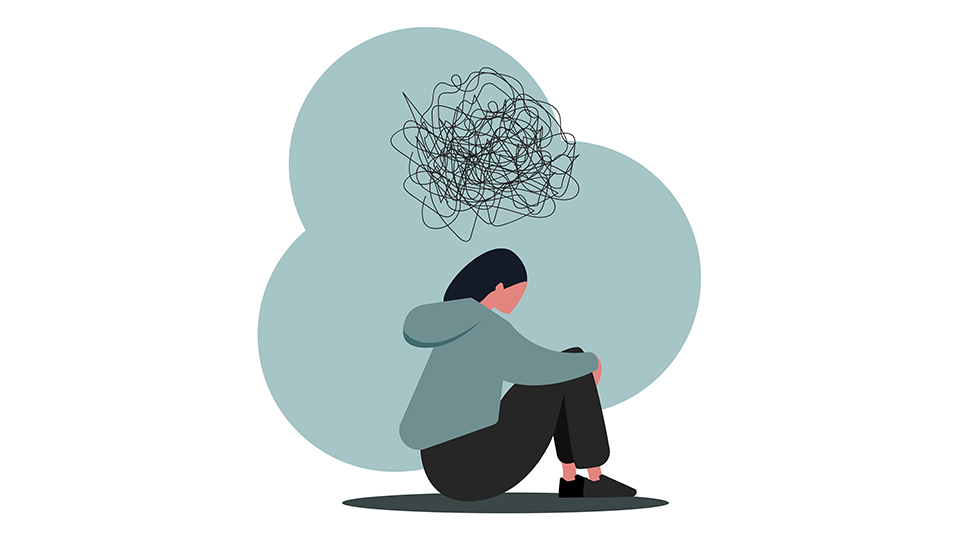

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv")
df.dropna(inplace=True)

In [4]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


<div style="border: 2px solid #4682B4; padding: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif; font-size: 16px; color: #333;"
  <strong>Numerical: 5 columns</strong><br>
  <strong>Categorical: 6 columns.</strong>
</div>



In [5]:
df.info

<bound method DataFrame.info of       Gender  Age  Work Pressure  Job Satisfaction     Sleep Duration  \
0     Female   37            2.0               4.0          7-8 hours   
1       Male   60            4.0               3.0          5-6 hours   
2     Female   42            2.0               3.0          5-6 hours   
3     Female   44            3.0               5.0          7-8 hours   
4       Male   48            4.0               3.0          7-8 hours   
...      ...  ...            ...               ...                ...   
2049  Female   45            1.0               3.0  Less than 5 hours   
2050    Male   25            1.0               5.0          5-6 hours   
2051  Female   23            3.0               1.0  Less than 5 hours   
2052  Female   24            1.0               4.0  Less than 5 hours   
2053  Female   56            2.0               3.0          7-8 hours   

     Dietary Habits Have you ever had suicidal thoughts ?  Work Hours  \
0          Moderat

In [6]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


# Exploratory Data Analysis

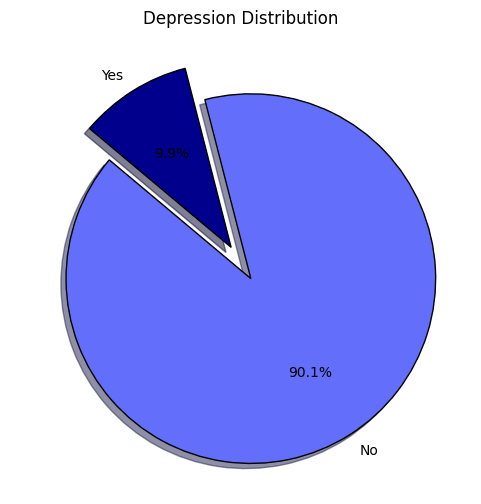

In [7]:
import matplotlib.pyplot as plt

depression_counts = df['Depression'].value_counts()

colors = ['#636efb', '#01008c']

plt.figure(figsize=(6, 6))
plt.pie(depression_counts, 
        labels=depression_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        shadow=True, 
        explode=[0.1] * len(depression_counts),  
        wedgeprops={'edgecolor': 'black'})  

plt.title('Depression Distribution')

plt.show()


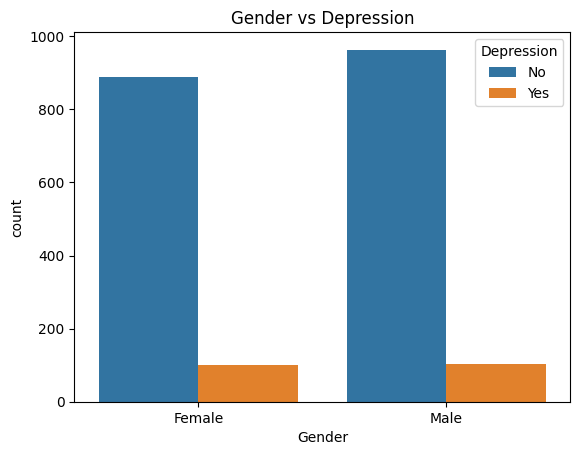

In [8]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Gender vs Depression')
plt.show()

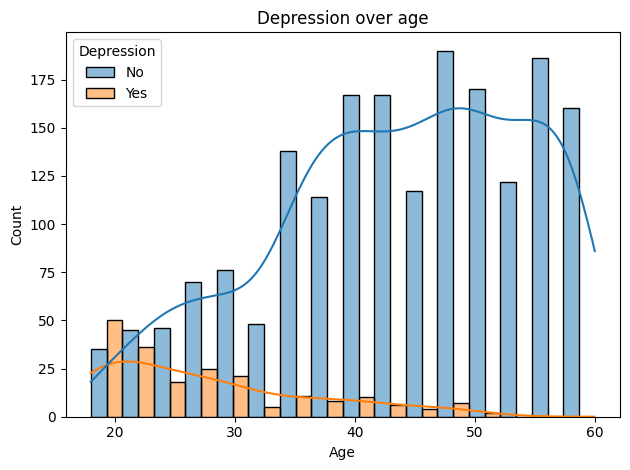

In [9]:
sns.histplot(df, x="Age", hue="Depression", multiple="dodge", kde=True)
plt.title("Depression over age")
plt.tight_layout()
plt.show()

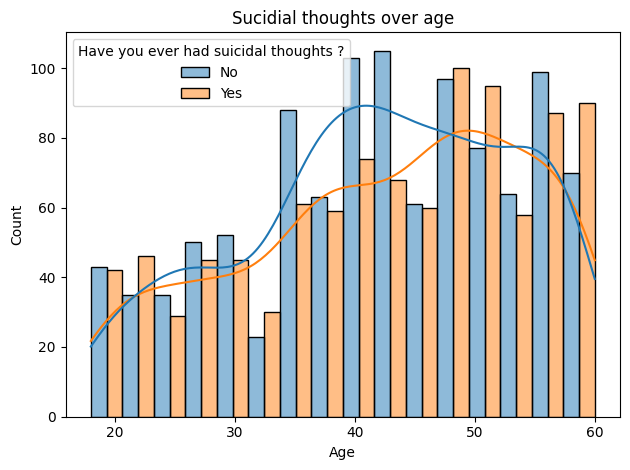

In [10]:
sns.histplot(df, x="Age", hue="Have you ever had suicidal thoughts ?", multiple="dodge", kde=True)
plt.title("Sucidial thoughts over age")
plt.tight_layout()
plt.show()

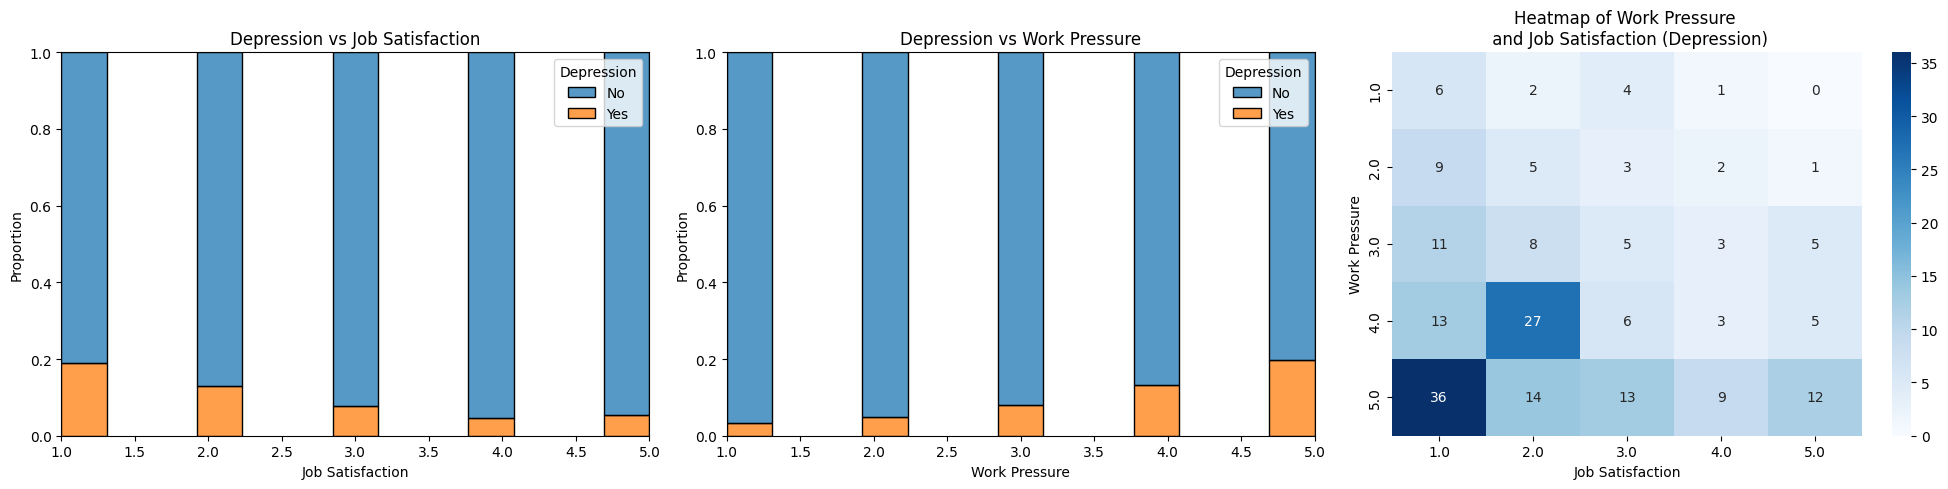

In [11]:

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(df, x="Job Satisfaction", hue="Depression", multiple="fill", ax=ax1)
ax1.set_title("Depression vs Job Satisfaction")
ax1.set_xlabel("Job Satisfaction")
ax1.set_ylabel("Proportion")

sns.histplot(df, x="Work Pressure", hue="Depression", multiple="fill", ax=ax2)
ax2.set_title("Depression vs Work Pressure")
ax2.set_xlabel("Work Pressure")
ax2.set_ylabel("Proportion")

crosstab = pd.crosstab(
    df[df['Depression'] == 'Yes']['Work Pressure'],
    df[df['Depression'] == 'Yes']['Job Satisfaction']
)
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues", ax=ax3)
ax3.set_title("Heatmap of Work Pressure \n and Job Satisfaction (Depression)")
ax3.set_xlabel("Job Satisfaction")
ax3.set_ylabel("Work Pressure")

plt.tight_layout()
plt.show()


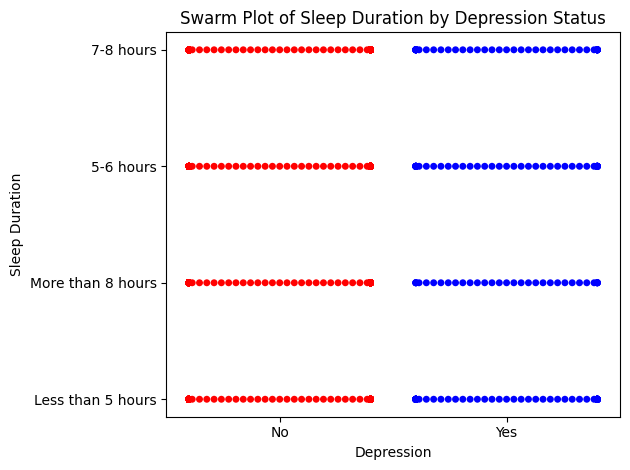

In [12]:
palette = {"Yes": "blue", "No": "red"}

sns.swarmplot(data=df, x='Depression', y='Sleep Duration', palette=palette)
plt.title("Swarm Plot of Sleep Duration by Depression Status")
plt.xlabel("Depression")
plt.ylabel("Sleep Duration")
plt.tight_layout()
plt.show()


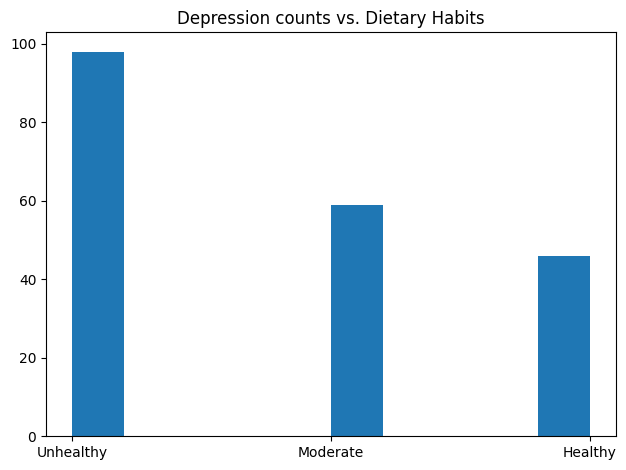

In [13]:
plt.hist(df.loc[df['Depression'] == "Yes"]['Dietary Habits'])
plt.title("Depression counts vs. Dietary Habits")
plt.tight_layout()
plt.show()

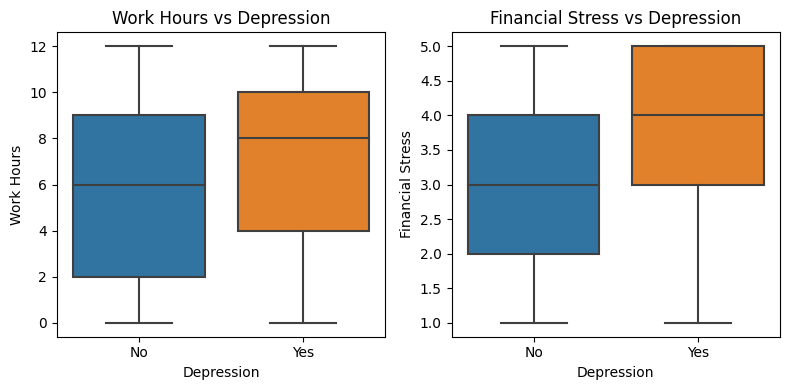

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(data=df, x="Depression", y="Work Hours", ax=axes[0])
axes[0].set_title('Work Hours vs Depression')

sns.boxplot(data=df, x="Depression", y="Financial Stress", ax=axes[1])
axes[1].set_title('Financial Stress vs Depression')

plt.tight_layout()
plt.show()

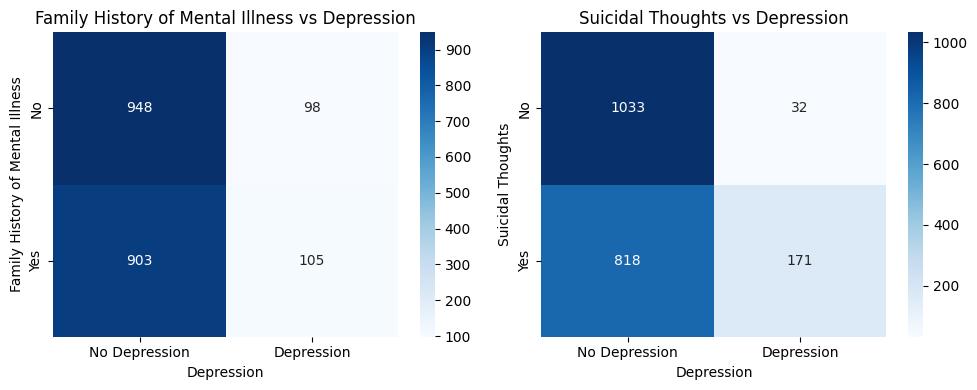

In [15]:

from sklearn.metrics import confusion_matrix
cm_family_history = confusion_matrix(df['Family History of Mental Illness'], df['Depression'])
cm_suicidal_thoughts = confusion_matrix(df['Have you ever had suicidal thoughts ?'], df['Depression'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_family_history, annot=True, fmt='d', cmap='Blues', xticklabels=["No Depression", "Depression"], 
            yticklabels=["No", "Yes"], ax=axes[0])
axes[0].set_title('Family History of Mental Illness vs Depression')
axes[0].set_xlabel('Depression')
axes[0].set_ylabel('Family History of Mental Illness')

sns.heatmap(cm_suicidal_thoughts, annot=True, fmt='d', cmap='Blues', xticklabels=["No Depression", "Depression"], 
            yticklabels=["No", "Yes"], ax=axes[1])
axes[1].set_title('Suicidal Thoughts vs Depression')
axes[1].set_xlabel('Depression')
axes[1].set_ylabel('Suicidal Thoughts')

plt.tight_layout()
plt.show()

# Sum Up EDA

<div style="border: 2px solid #4682B4; padding: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif; font-size: 16px; color: #333;">
  <strong>EDA showed us that depression is dependent mostly on:</strong><br>
  <strong>job-related factors (satisfaction and pressure), lifestyle choices (sleep and diet), and age. Family history has a moderate impact, while the strong link with suicidal thoughts highlights the importance of early intervention and treatment.</strong>
</d
v>
v>
v>


In [16]:
le=LabelEncoder()
for cols in df.select_dtypes('object'):
    df[cols]=le.fit_transform(df[cols])

df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,2.0,4.0,1,1,0,6,2,0,0
1,1,60,4.0,3.0,0,2,1,0,4,1,0
2,0,42,2.0,3.0,0,1,0,0,2,0,0
3,0,44,3.0,5.0,1,0,1,1,2,1,0
4,1,48,4.0,3.0,1,1,1,6,5,1,0


<Axes: >

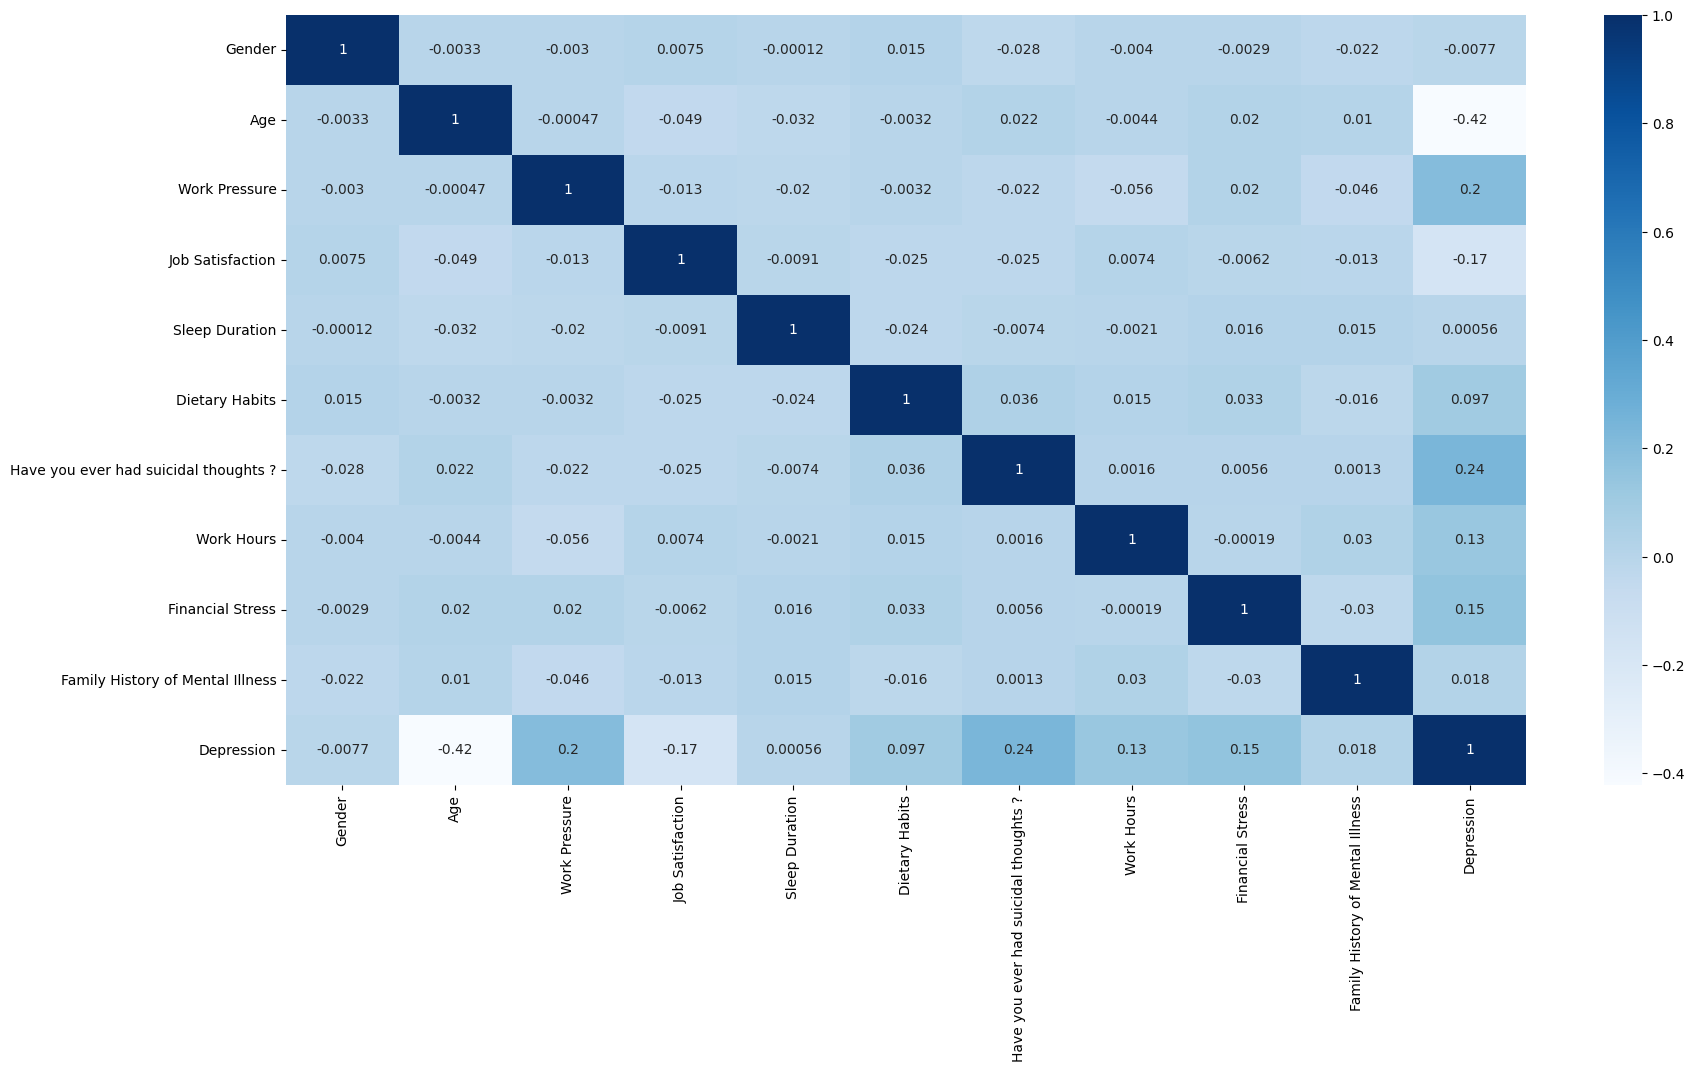

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [18]:
X=df.drop(["Depression"],axis=1)
y=df["Depression"]
y=pd.DataFrame(y)

In [19]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

# Modeling

# Random Forest Classifier

In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")

Random Forest Classifier Accuracy: 0.95


In [22]:
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       374
           1       0.94      0.43      0.59        37

    accuracy                           0.95       411
   macro avg       0.94      0.71      0.78       411
weighted avg       0.95      0.95      0.94       411



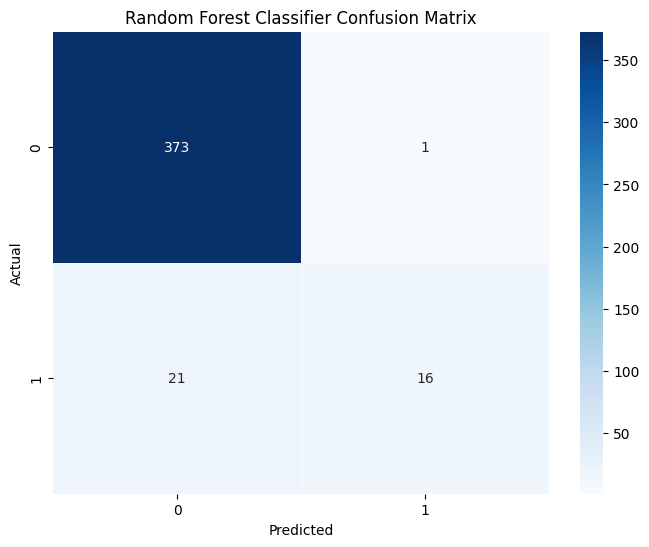

In [23]:
rf_cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

# Logistic Regression

In [24]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.98


In [25]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       374
           1       0.89      0.84      0.86        37

    accuracy                           0.98       411
   macro avg       0.93      0.91      0.92       411
weighted avg       0.98      0.98      0.98       411



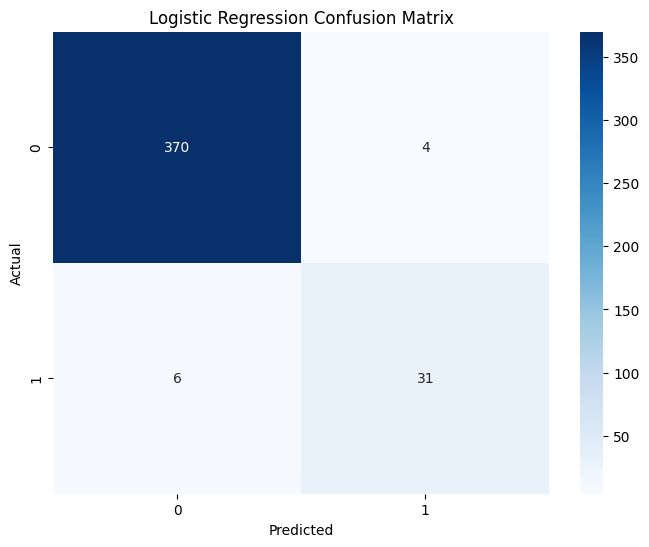

In [26]:
lr_cm = confusion_matrix(y_test, lr_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# XGBOOST

In [27]:
from xgboost import XGBClassifier
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train, y_train, early_stopping_rounds= 5, eval_set=eval_set, verbose=True)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[0]	validation_0-logloss:0.26321
[1]	validation_0-logloss:0.22723
[2]	validation_0-logloss:0.20514
[3]	validation_0-logloss:0.18577
[4]	validation_0-logloss:0.16894
[5]	validation_0-logloss:0.16069
[6]	validation_0-logloss:0.15054
[7]	validation_0-logloss:0.14278
[8]	validation_0-logloss:0.13671
[9]	validation_0-logloss:0.13468
[10]	validation_0-logloss:0.13420
[11]	validation_0-logloss:0.12630
[12]	validation_0-logloss:0.12253
[13]	validation_0-logloss:0.11968
[14]	validation_0-logloss:0.11648
[15]	validation_0-logloss:0.11291
[16]	validation_0-logloss:0.11233
[17]	validation_0-logloss:0.11000
[18]	validation_0-logloss:0.11039
[19]	validation_0-logloss:0.11054
[20]	validation_0-logloss:0.10844
[21]	validation_0-logloss:0.11042
[22]	validation_0-logloss:0.10799
[23]	validation_0-logloss:0.10628
[24]	validation_0-logloss:0.10426
[25]	validation_0-logloss:0.10329
[26]	validation_0-logloss:0.10437
[27]	validation_0-logloss:0.10517
[28]	validation_0-logloss:0.10277
[29]	validation_0-loglos

In [28]:
XG_accuracy = accuracy_score(y_test, predictions)
print(f" XGBClassifier Accuracy: {XG_accuracy:.2f}")

 XGBClassifier Accuracy: 0.94


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       374
           1       0.77      0.54      0.63        37

    accuracy                           0.94       411
   macro avg       0.86      0.76      0.80       411
weighted avg       0.94      0.94      0.94       411



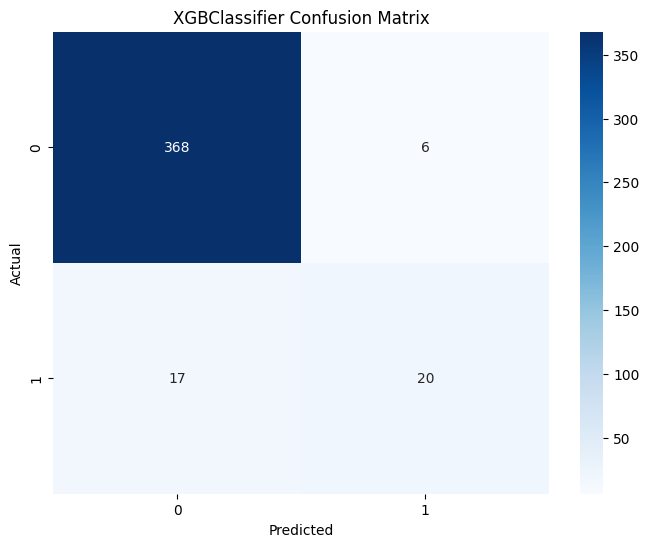

In [30]:
XG_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(XG_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBClassifier Confusion Matrix')
plt.show()

# Conclusion

<div style="border: 2px solid #4682B4; padding: 10px; background-color: #f0f8ff; font-family: Arial, sans-serif; font-size: 16px; color: #333;">
  - The <strong>Logistic Regression</strong> model stands out with the highest accuracy (<strong>0.98</strong>) and a balanced performance across all metrics.<br><br>
  - The <strong>Random Forest Classifier</strong> shows strong accuracy (<strong>0.95</strong>) but struggles with classifying the minority class (<strong>1</strong>), reflected in its lower recall for class <strong>1</strong>.<br><br>
  - The <strong>XGBoost Classifier</strong>, while still effective, has lower overall performance compared to <strong>Logistic Regression</strong> and <strong>Random Forest</strong>, with a recall of <strong>0.54</strong> for class <strong>1</strong>.<br><br>
  For deployment, <strong>Logistic Regression</strong> would be the preferred choice due to its higher accuracy and consistency across all metrics.
</div>
